In [13]:
#hide
from os import path
import requests
import numpy as np
import pandas as pd
from time_series_model_basics import moving_average, smoothing, metrics,optimizers

# SuperStore Data

>  Analytics for the Superstore Data

## Load Data

In [14]:

datafile = '../data/superstore_sales.csv'
url = "https://raw.githubusercontent.com/" + \
      "BigDataGal/Python-for-Data-Science/master/Superstore-Sales.csv"

if not path.isfile(datafile):
    with open(datafile, 'w') as file:
        r = requests.get(url)
        file.write(r.text)

df = pd.read_csv(
    datafile,
    index_col='Order Date',
    dtype={
        'Row ID': str,
        'Order ID': str, 
    },
    parse_dates=['Order Date', 'Ship Date'],
)

df.columns = ['_'.join(x.lower().split(' ')) for x in df.columns]

## Forecast

### DFU: Furniture for the Atlantic Region and Consumer Segment

In [15]:
region = 'Atlantic'
product_category = 'Furniture'
customer_segment = 'Consumer'

query = ' and '.join([
    f"region=='{region}'",
    f"product_category=='{product_category}'",
    f"customer_segment=='{customer_segment}'",
])

dff = df.query(query)
dff = dff.resample('2W').sum()

In [16]:
ts_col = 'sales'
pred_df, _ = moving_average.SMA(
    3,
    df=dff[[ts_col]].copy(),
    ts_col=ts_col,
)

pred_df, _ = moving_average.WMA(
    [1, 2, 3],
    df=pred_df.copy(),
    ts_col=ts_col,
)

pred_df, _ = smoothing.SINGLE(
    0.5,
    df=pred_df,
    ts_col=ts_col,
)

pred_df, _ = smoothing.DOUBLE(
    [0.35, 0.55],
    df=pred_df,
    ts_col=ts_col,
)

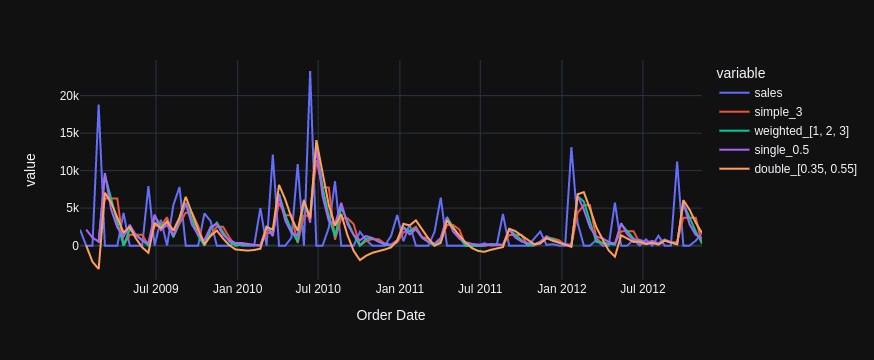

In [17]:
fig = pred_df.plot(backend='plotly',)
fig.update_layout(template="plotly_dark",)
fig.show()

## Optimizations

### Simple Smoothing

x*=0.07 f(x*)=2631.21


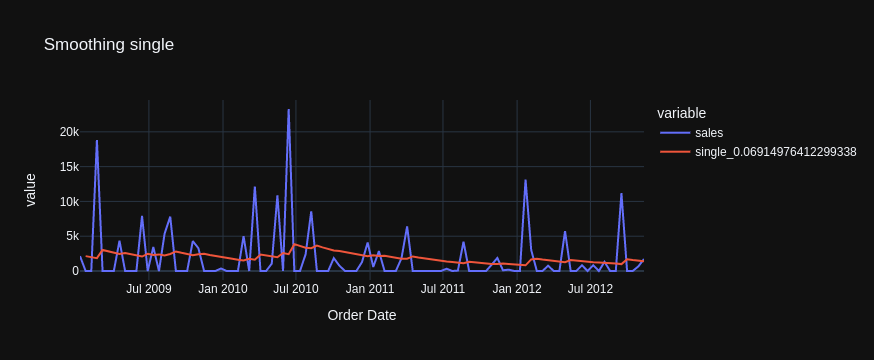

In [18]:
ts_col = 'sales'
alpha = optimizers.minimize_simple_smoothing(ts=dff[ts_col].to_numpy(),)
_, fig = smoothing.SINGLE(
    alpha,
    df=dff,
    ts_col=ts_col,
)

fig.show()

### Double Smoothing

x*=0.46, y*=0.12, f(x*,y*)=2974.47


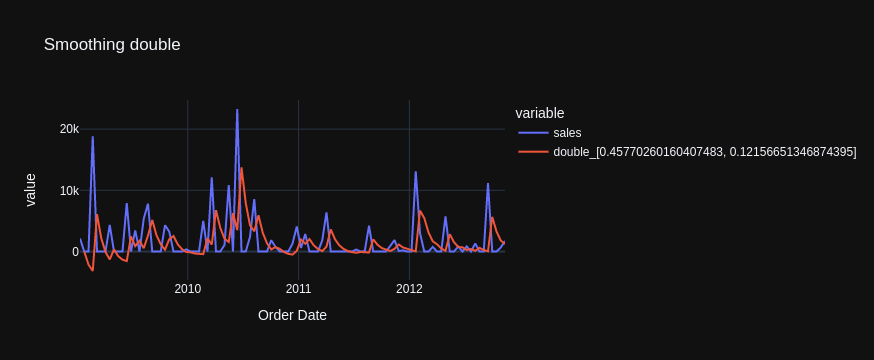

In [19]:
ts_col = 'sales'
res = optimizers.minimize_double_smoothing(ts=dff[ts_col].to_numpy(),)
_, fig = smoothing.DOUBLE(
    res,
    df=dff,
    ts_col=ts_col,
)

fig.show()

x*=0.33, y*=0.09, f(x*,y*)=2831.73


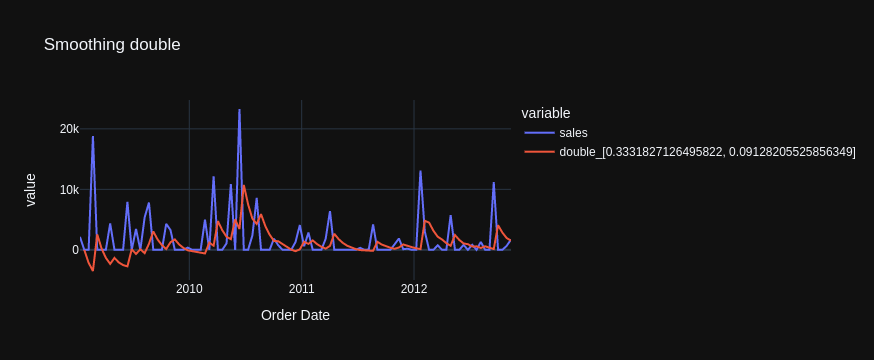

In [20]:
ts_col = 'sales'
res = optimizers.minimize_double_smoothing(ts=dff[ts_col].to_numpy(),)
_, fig = smoothing.DOUBLE(
    res,
    df=dff,
    ts_col=ts_col,
)

fig.show()

## References